# House Property Sales Time Series
This Datasets contains property sales data for the 2007-2019 period for one specific region. 
The data contains sales prices for houses and units with 1,2,3,4,5 bedrooms.

## Objective
- making a forecast for this analysis


# The following team Members worked on this project:

    Ehijie Agbagu
    Adesegun Adeboye
    Kolawole Abdulquadri
    Sodiq Muritala
    Hassan Mustapha
    Ayomide Oluwole
    Rofiat Kareem 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data2 = pd.read_csv(r"C:\Users\HP\Downloads\Property_sales1.csv")
data2.head()

,datesold,postcode,price,propertyType,bedrooms
0,2/7/2007 0:00,2607,525000,house,4
1,2/27/2007 0:00,2906,290000,house,3
2,3/7/2007 0:00,2905,328000,house,3
3,3/9/2007 0:00,2905,380000,house,4
4,3/21/2007 0:00,2906,310000,house,3


In [4]:
data2.shape

(29580, 5)

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
data2.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')

In [7]:
data2.isna() # this checks for Nan values across each column in the dataset

,datesold,postcode,price,propertyType,bedrooms
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
29575,False,False,False,False,False
29576,False,False,False,False,False
29577,False,False,False,False,False
29578,False,False,False,False,False


In [8]:
data2.isna().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [9]:
data2.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


# unianalysis

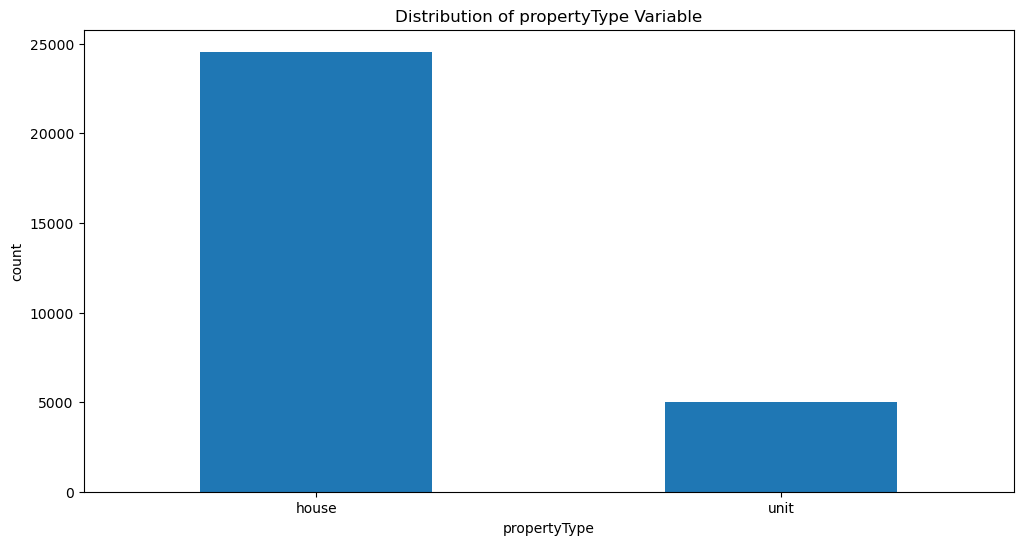

In [17]:
plt.figure(figsize=(12, 6))
data2['propertyType'].value_counts().plot(kind='bar')
plt.title("Distribution of propertyType Variable")
plt.xlabel("propertyType")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

In [16]:
data2.propertyType.value_counts()

house    24552
unit      5028
Name: propertyType, dtype: int64

In [20]:
# Assuming you have a DataFrame named tc
PT = data2["propertyType"].value_counts()

# Calculate the total number of observations
total_observations = PT.sum()

# Convert counts to percentages
PTPercent = round((PT / total_observations) * 100, 1)

b = print(PTPercent)
print(b)

house    83.0
unit     17.0
Name: propertyType, dtype: float64
None


In [ ]:
# across the dataset house had 83% of the purchase making it the most sought-after over unit which had 17% 

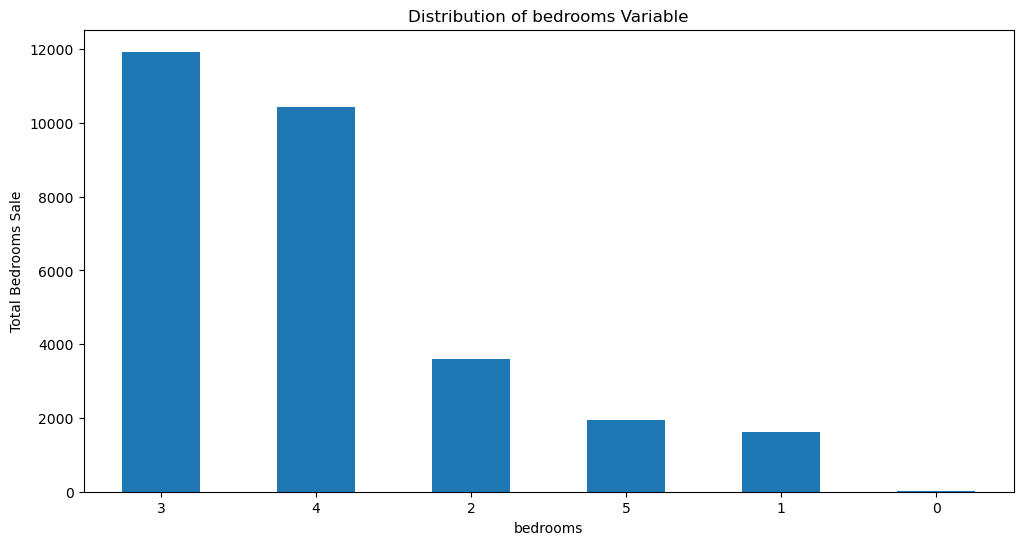

In [10]:
plt.figure(figsize=(12, 6))
data2['bedrooms'].value_counts().plot(kind='bar')
plt.title("Distribution of bedrooms Variable")
plt.xlabel("bedrooms")
plt.ylabel("Total Bedrooms Sale")
plt.xticks(rotation=0)
plt.show()

In [16]:
data2.bedrooms.value_counts()

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64

In [24]:
# Assuming you have a DataFrame named tc
bm = data2["bedrooms"].value_counts()

# Calculate the total number of observations
total_observations = bm.sum()

# Convert counts to percentages
bmPercent = round((bm / total_observations) * 100, 1)

b = print(bmPercent)
print(b)

3    40.3
4    35.3
2    12.2
5     6.6
1     5.5
0     0.1
Name: bedrooms, dtype: float64
None


In [23]:
# Assuming you have a DataFrame named data2
unit_bed_counts = {}

# Define the number of bedrooms to count
num_bedrooms_list = [1, 2, 3, 4, 5]

# Iterate through each number of bedrooms
for num_bedrooms in num_bedrooms_list:
    # Calculate the number of properties with a property type of "unit" and the current number of bedrooms
    count = data2[(data2['propertyType'] == 'unit') & (data2['bedrooms'] == num_bedrooms)].shape[0]
    # Store the count in the dictionary
    unit_bed_counts[num_bedrooms] = count

# Print the result
print("Number of Bedrooms for Unit:")
for num_bedrooms, count in unit_bed_counts.items():
    print(f"{num_bedrooms} bedrooms: {count}")

Number of Bedrooms for Unit:
1 bedrooms: 1532
2 bedrooms: 2792
3 bedrooms: 652
4 bedrooms: 38
5 bedrooms: 3


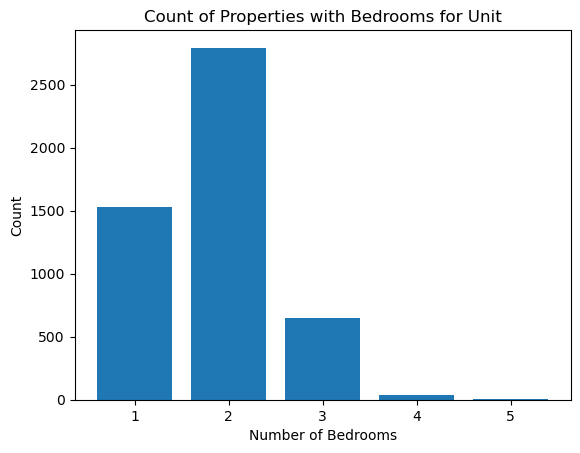

In [26]:
# Plot the graph
plt.bar(unit_bed_counts.keys(), unit_bed_counts.values())
plt.title("Count of Properties with Bedrooms for Unit")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.xticks(num_bedrooms_list)
plt.show()

In [19]:
# Assuming you have a DataFrame named data2
house_bed_counts = {}

# Define the number of bedrooms to count
num_bedrooms_list = [1, 2, 3, 4, 5]

# Iterate through each number of bedrooms
for num_bedrooms in num_bedrooms_list:
    # Calculate the number of properties with a property type of "house" and the current number of bedrooms
    count = data2[(data2['propertyType'] == 'house') & (data2['bedrooms'] == num_bedrooms)].shape[0]
    # Store the count in the dictionary
    house_bed_counts[num_bedrooms] = count

# Print the result
print("Number of Bedrooms for House:")
for num_bedrooms, count in house_bed_counts.items():
    print(f"{num_bedrooms} bedrooms: {count}")

Number of Bedrooms for House:
1 bedrooms: 95
2 bedrooms: 806
3 bedrooms: 11281
4 bedrooms: 10404
5 bedrooms: 1947


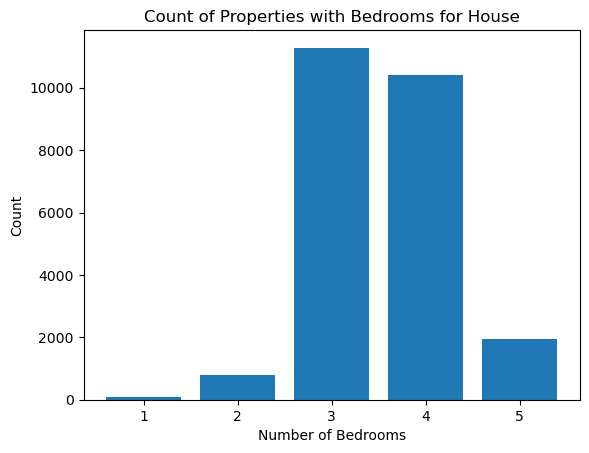

In [25]:
# Plot the graph
plt.bar(house_bed_counts.keys(), house_bed_counts.values())
plt.title("Count of Properties with Bedrooms for House")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.xticks(num_bedrooms_list)
plt.show()

In [ ]:
# According to the figures about people who puorchase units are those who mostly single or double bedrooms,
# While those who purchase house are those who go for 3 or more bedrooms

### Distribution of Price 
To check for the skewness

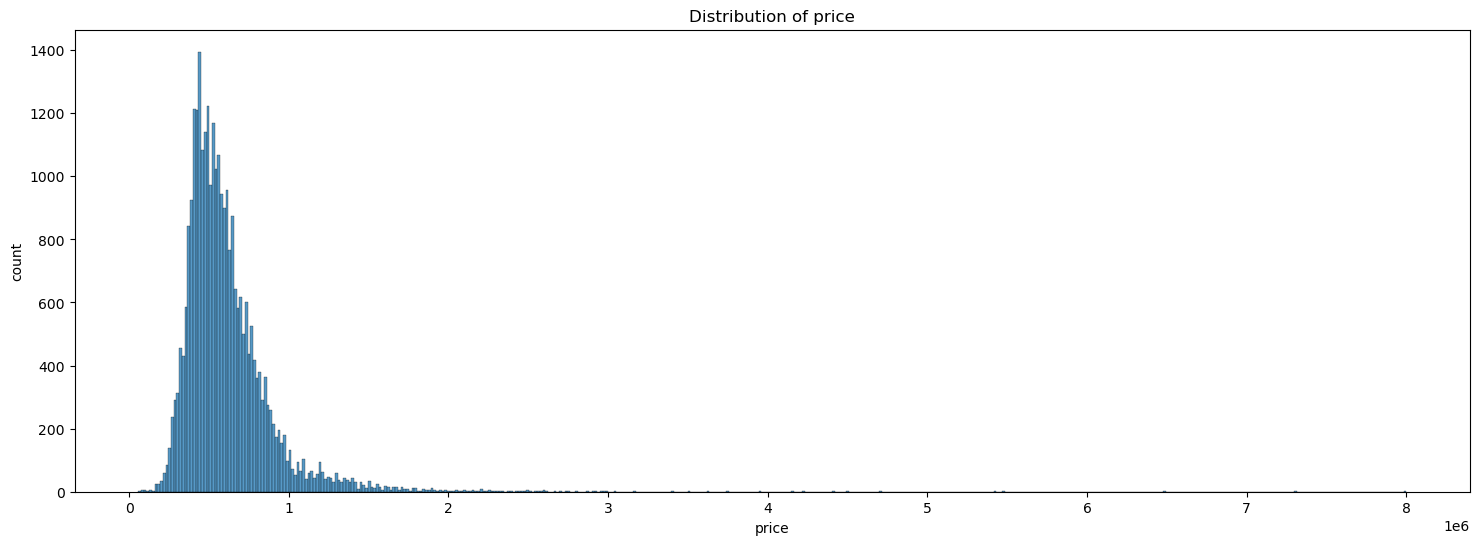

In [28]:
plt.figure(figsize = (18,6))
sns.histplot(data2["price"])
plt.title('Distribution of price')
plt.xlabel("price")
plt.ylabel("count")
plt.show()

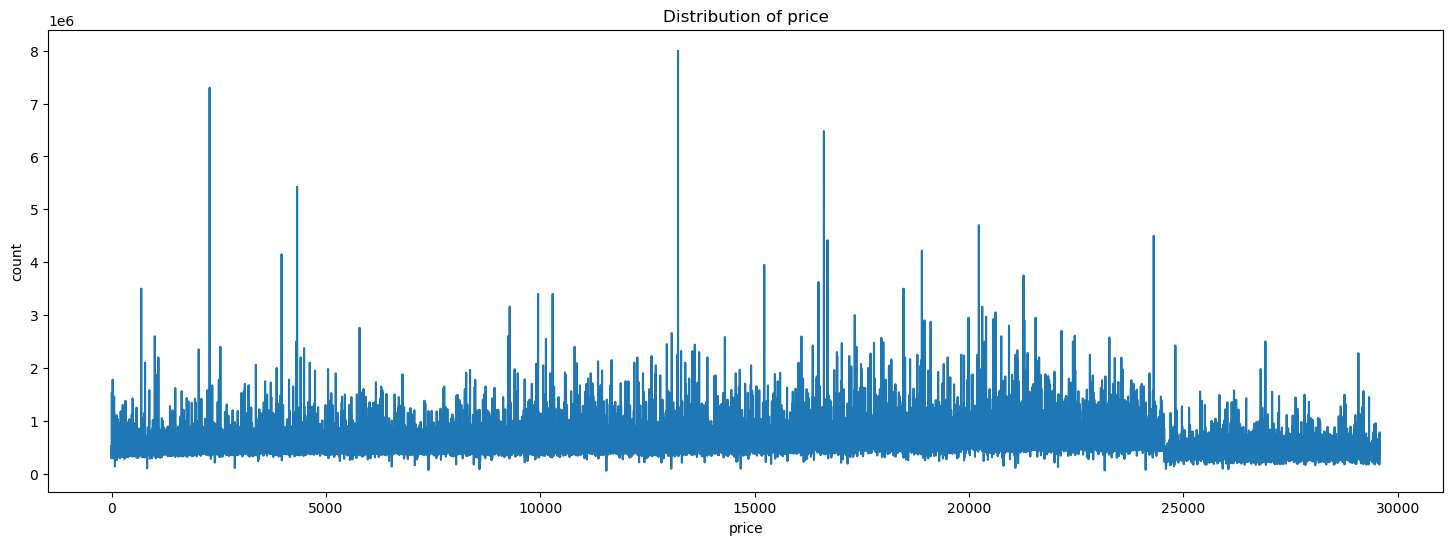

In [40]:
plt.figure(figsize = (18,6))
sns.lineplot(data2["price"])
plt.title('Distribution of price')
plt.xlabel("price")
plt.ylabel("count")
plt.show()

In [ ]:
# This an Asymmetrical, meaning that the price is on the right side from the Histgram plots. 
# The data is not properly distributed.

In [33]:
data2['postcode'].value_counts() # checking for the postcode that has the highest distribgustion

2615    3566
2602    2603
2913    2558
2905    2259
2617    2115
2914    1972
2611    1864
2906    1640
2612    1210
2614    1058
2604    1058
2902    1035
2607     963
2904     919
2603     805
2605     771
2903     675
2606     659
2600     634
2912     499
2601     260
2911     249
2900     152
2620      26
2616      11
2609      10
2618       9
Name: postcode, dtype: int64

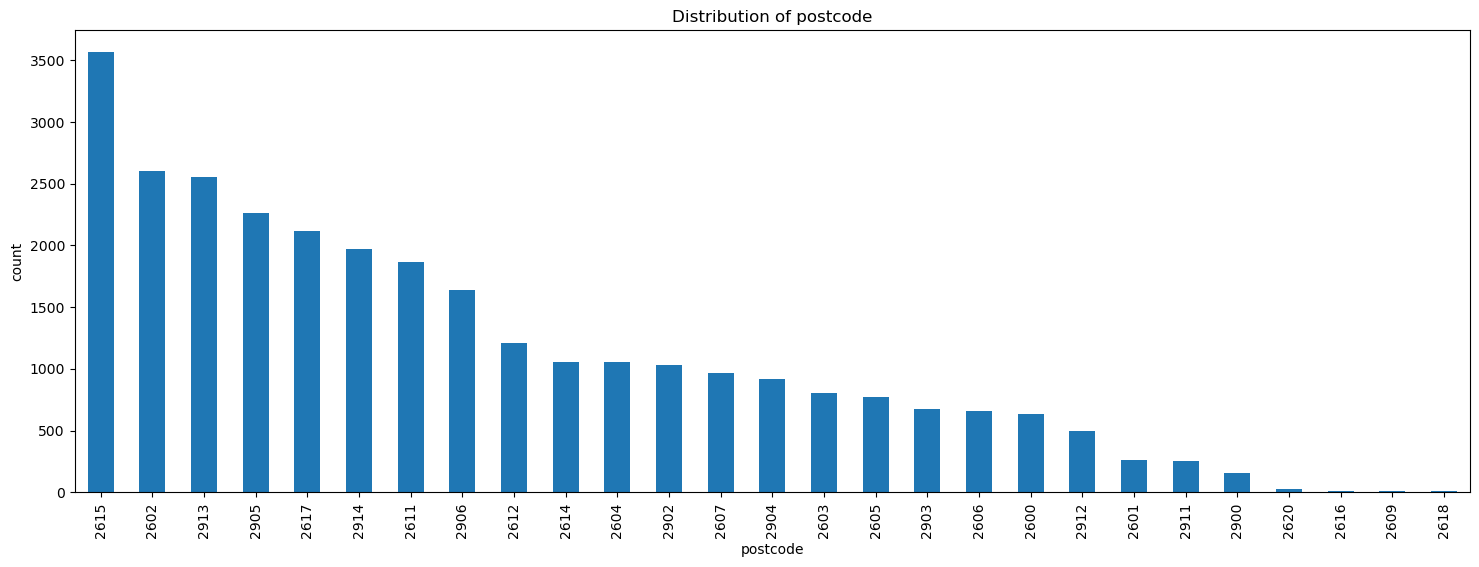

In [36]:
plt.figure(figsize = (18,6))
data2['postcode'].value_counts().plot(kind='bar')
plt.title('Distribution of postcode')
plt.xlabel("postcode")
plt.ylabel("count")
plt.show()

In [37]:
# 2615 has the highest distributions on the postcode meaning it has the hightest sales location. 


# Bivariate Analysis

In [39]:
"""
As we can see that our dataset didn't contained regular daily, monthly, and yearly data, 
we can extract them from the datesode feature. 
"""

"\nAs we can see that our dataset didn't contained regular daily, monthly, and yearly data, \nwe can extract them from the datesode feature. \n"

In [60]:
data2["datesold"] = pd.to_datetime(data2["datesold"]) 
# converting the datasold column to datetime format

In [58]:
data2['datesold']

0         2/7/2007 0:00
1        2/27/2007 0:00
2         3/7/2007 0:00
3         3/9/2007 0:00
4        3/21/2007 0:00
              ...      
29575    7/25/2019 0:00
29576    7/25/2019 0:00
29577    7/26/2019 0:00
29578    7/26/2019 0:00
29579    7/26/2019 0:00
Name: datesold, Length: 29580, dtype: object

In [62]:
# extracting the date, month and year from  the datesold column to have additional 
3 columns to enhance our visiuation 
data2["day"] = data2["datesold"].dt.day
data2["month"] = data2["datesold"].dt.month
data2["year"] = data2["datesold"].dt.year

In [63]:
data2.head()

,datesold,postcode,price,propertyType,bedrooms,day,month,year
0,2007-02-07,2607,525000,house,4,7,2,2007
1,2007-02-27,2906,290000,house,3,27,2,2007
2,2007-03-07,2905,328000,house,3,7,3,2007
3,2007-03-09,2905,380000,house,4,9,3,2007
4,2007-03-21,2906,310000,house,3,21,3,2007


In [64]:
data2.tail()

,datesold,postcode,price,propertyType,bedrooms,day,month,year
29575,2019-07-25,2900,500000,unit,3,25,7,2019
29576,2019-07-25,2612,560000,unit,2,25,7,2019
29577,2019-07-26,2912,464950,unit,2,26,7,2019
29578,2019-07-26,2601,589000,unit,2,26,7,2019
29579,2019-07-26,2612,775000,unit,2,26,7,2019


In [65]:
data2['month'].value_counts()

11    3102
3     2878
5     2797
2     2656
10    2548
4     2468
12    2432
8     2429
7     2386
9     2367
6     2213
1     1304
Name: month, dtype: int64

In [66]:
data2['year'].value_counts()

2017    4541
2016    3908
2018    3858
2015    3648
2014    2863
2013    2119
2012    1858
2011    1633
2010    1555
2009    1426
2019    1385
2008     639
2007     147
Name: year, dtype: int64

In [93]:
# checking for the highest monthly sale of the property type
property_per_month = data2.groupby("month")["propertyType"].apply(lambda x: x.value_counts())

In [94]:
print(property_per_month) . 

month       
1      house    1001
       unit      303
2      house    2150
       unit      506
3      house    2419
       unit      459
4      house    2022
       unit      446
5      house    2325
       unit      472
6      house    1843
       unit      370
7      house    1927
       unit      459
8      house    2020
       unit      409
9      house    1967
       unit      400
10     house    2145
       unit      403
11     house    2667
       unit      435
12     house    2066
       unit      366
Name: propertyType, dtype: int64


In [44]:
property_per_month.plot(kind="bar", color ="b")
plt.title('counts of unique Property Types for each month')
plt.xlabel("Month")
plt.ylabel("count")
plt.xticks(rotation = 45)
plt.legend(title="Property Type")
plt.show()

NameError: name 'property_per_month' is not defined

In [74]:
# We can see that the 11 month has the highest sales of property 

In [102]:
property_per_year = data2.groupby("year")["propertyType"].apply(lambda x: x.value_counts())

In [103]:
property_per_year

year       
2007  house     130
      unit       17
2008  house     592
      unit       47
2009  house    1235
      unit      191
2010  house    1374
      unit      181
2011  house    1439
      unit      194
2012  house    1612
      unit      246
2013  house    1841
      unit      278
2014  house    2507
      unit      356
2015  house    3093
      unit      555
2016  house    3213
      unit      695
2017  house    3630
      unit      911
2018  house    2864
      unit      994
2019  house    1022
      unit      363
Name: propertyType, dtype: int64

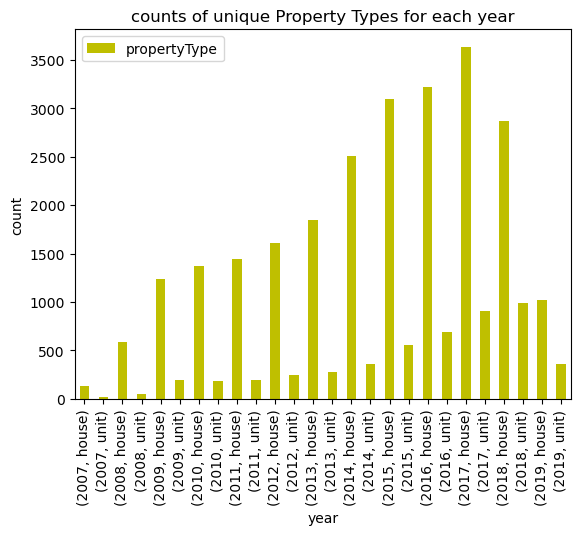

In [110]:

property_per_year.plot(kind="bar", color ="y")
plt.title('counts of unique Property Types for each year')
plt.xlabel("year")
plt.ylabel("count")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [111]:
# year 2017 has the hightest sales of property. 

## Summary of the Analysis Conducted on House Property Sales Time Series
- The 3-bedroom category exhibits the highest sales, followed by the 4-bedroom category.
- House properType shows the highest number of properties sold based on the analysis.
- The price distribution matrix displays is an Asymmetrical, meaning that the price is on the right side from the Histgram plots. The data is not properly distributed.
- Postcode 2615 stands out with the highest sales, indicating a prime location.
- The 11th month records the highest property sales within a given year.
- There is a consistent upward trend in sales from 2009 to 2017, reaching the peak in 2017, followed by a decline starting in 2018.

These insights hold significant importance for the company's decision-making process.

